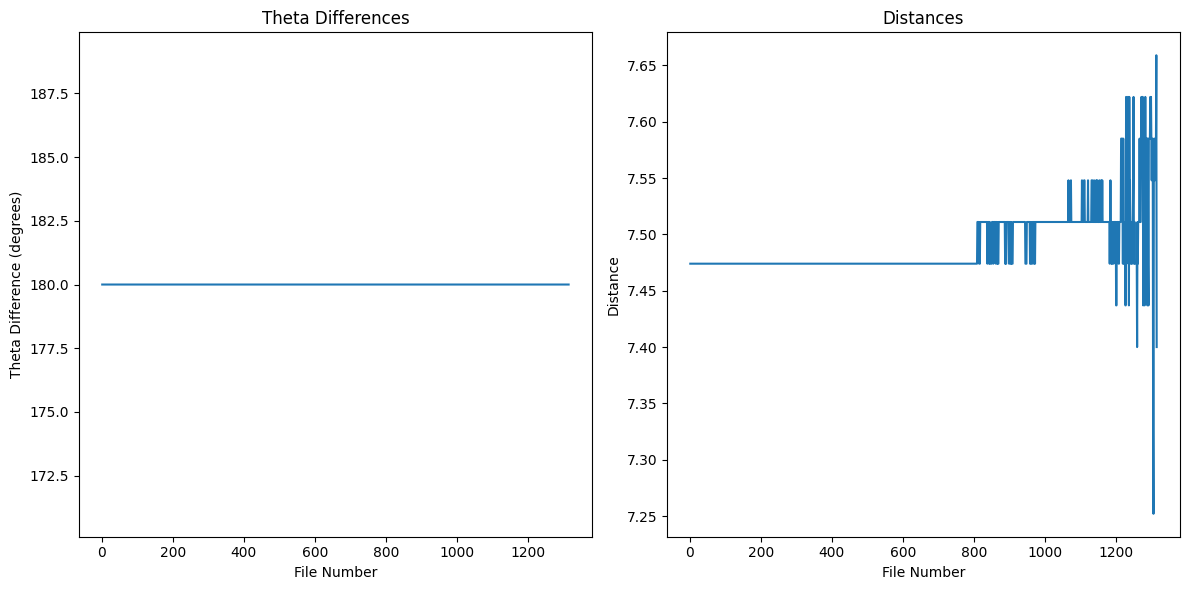

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

file1 = r"C:\Users\doyeob\Desktop\3layerBP data\devided data\polar\200\200-1 information.xlsx"
file2 = r"C:\Users\doyeob\Desktop\3layerBP data\devided data\polar\200\200-2 information.xlsx"
output_file1 = r"C:\Users\doyeob\Desktop\3layerBP data\devided data\polar\200\adjusted\200-1 transformed.xlsx"
output_file2 = r"C:\Users\doyeob\Desktop\3layerBP data\devided data\polar\200\adjusted\200-2 transformed.xlsx"

# 출력 파일의 디렉토리가 존재하는지 확인하고, 존재하지 않으면 생성
output_dir1 = os.path.dirname(output_file1)
output_dir2 = os.path.dirname(output_file2)
if not os.path.exists(output_dir1):
    os.makedirs(output_dir1)
if not os.path.exists(output_dir2):
    os.makedirs(output_dir2)

# 데이터 불러오기
df1 = pd.read_excel(file1)
df2 = pd.read_excel(file2)

# 필요한 행만 추출
df1 = df1.iloc[1:1314]
df2 = df2.iloc[1:1314]

# 변환 과정
df1['r_prime'] = df1.iloc[:, 1] * (2.96 / 160)
df1['theta_prime'] = df1.iloc[:, 2] * (360 / 1024)

df2['r_prime'] = df2.iloc[:, 1] * (2.96 / 160)
df2['theta_prime'] = df2.iloc[:, 2] * (360 / 1024)

# 두 점 사이의 거리 계산
distances = []
theta_diffs = []

for i in range(len(df1)):
    r1, theta1 = df1.loc[df1.index[i], ['r_prime', 'theta_prime']]
    r2, theta2 = df2.loc[df2.index[i], ['r_prime', 'theta_prime']]
    
    distance = np.sqrt(r1**2 + r2**2 - 2 * r1 * r2 * np.cos(np.radians(theta1 - theta2)))
    distances.append(distance)
    theta_diffs.append(abs(theta1 - theta2))

df1['distance'] = distances
df1['theta_diff'] = theta_diffs

# 거리와 theta 차이 플로팅
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(df1.iloc[:, 0], df1['theta_diff'])
plt.title('Theta Differences')
plt.xlabel('File Number')
plt.ylabel('Theta Difference (degrees)')

plt.subplot(1, 2, 2)
plt.plot(df1.iloc[:, 0], df1['distance'])
plt.title('Distances')
plt.xlabel('File Number')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()

# 변환된 데이터와 원래 데이터 합치기
df_output1 = df1[[df1.columns[0], df1.columns[3], 'r_prime', 'theta_prime']]
df_output2 = df2[[df2.columns[0], df2.columns[3], 'r_prime', 'theta_prime']]
df_output1.to_excel(output_file1, index=False)
df_output2.to_excel(output_file2, index=False)
